# FINAL

In [1]:
import numpy as np
np.random.seed(1000)
import scipy.stats as scs  
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline    
from math import log, sqrt, exp
from scipy import stats
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

###  Section 2.2

The function pathsimulation output different paths behaviour of an Ornstein Uhlenbeck process given the set of inputs; the initial price, the reversion rate, the mean, standard deviation, number of paths to genetrate and the number of data points.

\begin{align}
ds&=a(b-s)dt+\sigma dW\\
s(t+\Delta t)&=s(t)+a(b-s(t))\Delta t+\sigma\sqrt{\Delta t}\,z
\end{align}

In [2]:
def pathsimulation(S0,a,b,T,sigma,I,N):             
    np.random.seed(100)
    dt=T/N                                         # time interval
    dt1=np.linspace(0,T,N)              #Return evenly spaced numbers over 0 to T.                    
    s=np.zeros((N+1,I))    # Each column represents a single path(I of these) and each row represents a path
    s[0,:]=S0              # intialize each column with the initial price
               
    for j in range(1,N+1):
        z = np.random.standard_normal(I)                              # draws from a standard normal distribution
        s[j,:]=s[j-1,:]+a*(b-s[j-1,:])*dt + sigma*np.sqrt(dt)*z       # vector difference equation
    return s
s= pathsimulation(7,1.8,4.5,10,0.5,4,400)

* Plot of the paths generated.

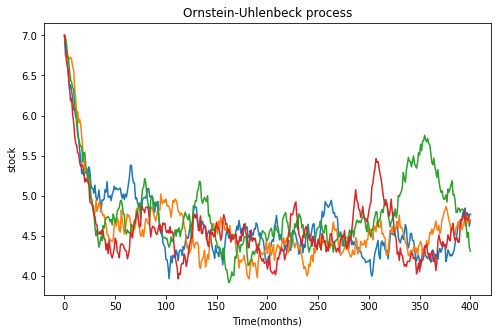

In [3]:
plt.figure(figsize=(8,5))  
plt.plot(s[:])                # plot all 4 possible paths
plt.title('Ornstein-Uhlenbeck process')
plt.ylabel('stock')
plt.xlabel('Time(months)')
plt.legend()
plt.savefig('example3.png')
plt.show()

## Example 2.2.2

Using the same function from above, we use specific values for the inputs to show in the example

* This difference between the first plot and the second plot below is that, the first plot uses a mean reversion rate of $\lambda=1.5$ whiles the second uses $\lambda=0.4$.

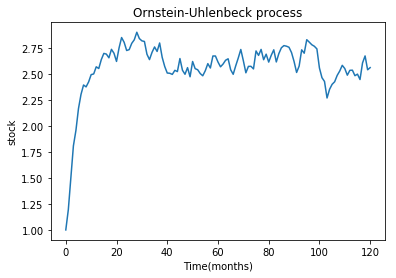

In [4]:
s= pathsimulation(1.0,1.5,2.7,15,0.2,1,120)

plt.figure()  
plt.plot(s[:])
plt.title('Ornstein-Uhlenbeck process')
plt.ylabel('stock')
plt.xlabel('Time(months)')
plt.legend()
plt.savefig('example14.png')
plt.show()

#### $\lambda =0.4$

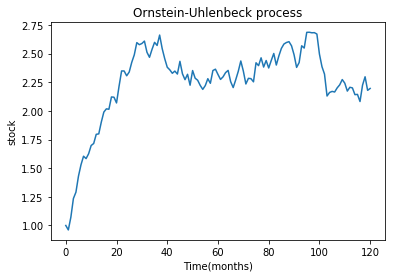

In [5]:
s= pathsimulation(1.0,0.4,2.7,15,0.2,1,120)

plt.figure()  
plt.plot(s[:])
plt.title('Ornstein-Uhlenbeck process')
plt.ylabel('stock')
plt.xlabel('Time(months)')
plt.legend()
plt.savefig('example10.png')
plt.show()

## Section 2.3

We make simulations of the OU model and use the points generated to plot the path of the process. This step is useful in chapter 4.

In [6]:
%%time
def Sim_path1(lambd,mu,vol,S0):
    N=821              # number of data points 
    T=3                 # time is three year
    S =  np.zeros(N) 
    expected = np.zeros(N)          # initialize the expected as an array
    SD = np.zeros(N) 
    time = np.linspace(0,T,N)          # discretize time over an interval of N           
    timedelta = time[2]-time[1]        # time step
    #calculating the expected, SD,S=stimulation of the mean reverted(solution of the OU)
    expected = S0 * np.exp(-lambd*time) + mu*(1-np.exp(-lambd*time))
    SD = vol*np.sqrt((1-np.exp(-2*lambd *timedelta*np.ones(N)))/(2*lambd))
    weightSD = SD * np.linspace(0.1, 1.9, N)
    S = expected + SD*np.random.randn(N)            # calculate stock prices 
    x = S[0:-1]
    y = S[1:]

    return time, expected, S, SD
 
time, expected, pts, SD = Sim_path1(15,13.59,1.085,11.62)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 670 µs


* Plot of the simulated path

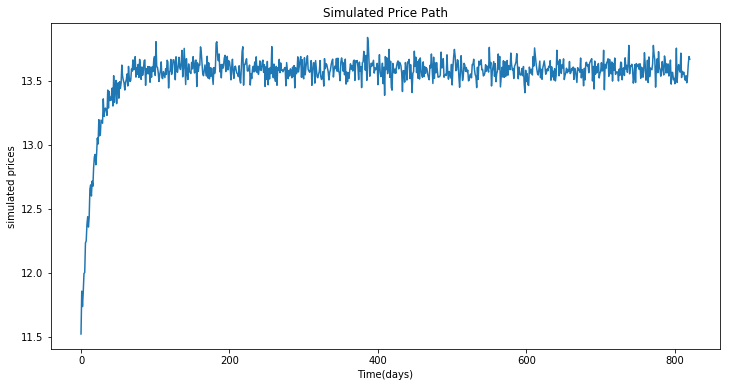

In [7]:
plt.figure(figsize=(12,6))
ss=pts.tolist()
plt.plot(ss)
plt.ylabel('simulated prices')
plt.xlabel('Time(days)')
plt.legend()
plt.title('Simulated Price Path')
plt.savefig('simulatedSA')

# 4.2  IMPLEMENTATION

The path below is simulated using the mean 13.516 and standard deviation 1.18of the OU process.
We then calibrate the simulations by the model to the estimation techniques to find estimates of the parameters.
Consequently, it is expected that the error between the initial simulation and simulations by using the estimated values should be minimal.

### Now we generate the simulation using the OU model. Then calibrate the model with the estimation methods.

In [8]:
%%time
def Sim_path(lambd,mu,vol,S0):
    N=821              # data points 
    T= 3                # time 
    S =  np.zeros(N)               # initialize the stock price as an array
    expected = np.zeros(N)          # initialize the expected as an array
    SD = np.zeros(N) 
    time = np.linspace(0,T,N)          # discretize time over an interval of N              
    timedelta = time[2]-time[1]        # time step
    #calculating the expected, SD,S=stimulation of the mean reverted(solution of the OU)
    expected = S0 * np.exp(-lambd*time) + mu*(1-np.exp(-lambd*time))
    SD = vol*np.sqrt((1-np.exp(-2*lambd *timedelta*np.ones(N)))/(2*lambd))
    weightSD = SD * np.linspace(1.9, 0.1, N)
    S = expected + SD*np.random.randn(N)
    x = S[0:-1]
    y = S[1:]
    trueslope=np.exp(-lambd*timedelta)
    trueintercept=mu*(1-trueslope)
    trueSd= vol*np.sqrt((1-np.exp(-2*lambd*timedelta))/(2*lambd))
    truefit = np.polyval([trueslope, trueintercept], x)
    
    print('True parameter values of simulation ''\n')
    print(' mu \t \t lambda \t \t sigma \t \t Slope \t  \t Intercept \t Standard Deviation \n')
    print( mu,'\t  \t ' ,lambd,'\t \t \t' , vol,' \t \t', trueslope ,'\t', trueintercept,trueSd)
    return time, expected, S, SD,mu, lambd, vol, trueslope , trueintercept,trueSd,truefit,x,y,weightSD 
 
t, e, s, sd,mt,lt,vt,tst,tit,tsdt,tf,x,y,weightSD  = Sim_path(12,13.516,1.18,11.699)

True parameter values of simulation 

 mu 	 	 lambda 	 	 sigma 	 	 Slope 	  	 Intercept 	 Standard Deviation 

13.516 	  	  12 	 	 	 1.18  	 	 0.957047323389 	 0.580548377073 0.0698348438321
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.36 ms


* Plot time against the expected, the stock prices and a plus and minus confidence interval. Confidence interval bounded by the standard deviation.

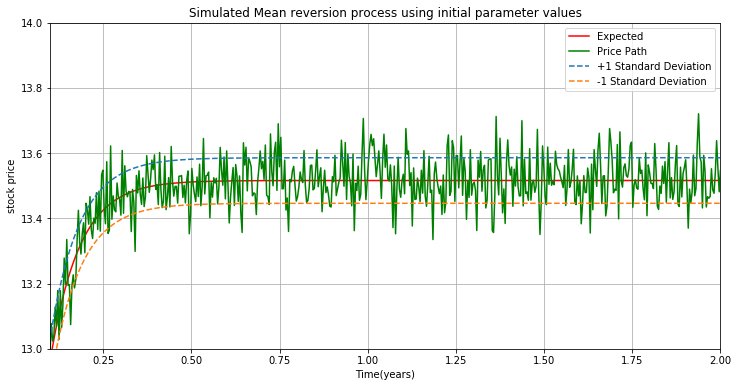

In [9]:
plt.figure(figsize=(12,6))
plt.plot( t, e,'r', label='Expected')
plt.plot( t, s,'g', label='Price Path')
plt.plot( t,e+sd,'--', label='+1 Standard Deviation')
plt.plot(t,e-sd ,'--',label='-1 Standard Deviation')
plt.ylabel('stock price')
plt.xlabel('Time(years)')
plt.xlim(0.1, 2)
plt.ylim(13, 14)
plt.legend()
plt.title('Simulated Mean reversion process using initial parameter values')
plt.grid('on')
plt.savefig('SAOUpath1')

### Scatter plot of the data generated

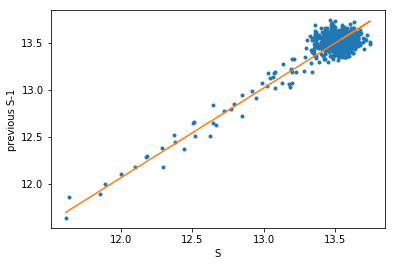

In [10]:
plt.plot( x ,y,'.',x,tf)
plt.ylabel('previous S-1')
plt.xlabel('S')

### We calibrate the simulation using the least squares method for parameters estimation

In [11]:
%%time
# Ordinary LEAST SQUARES OU
def Ordinary_LS(S,timdelta):    #S is the simulated data points
    x=S[0:-1]                   # set a list of previous prices
    y=S[1:]                     # set a list of current prices
    n=len(y)
    sx = sum(x)
    sy = sum(y)
    sxx = sum(x**2)
    sxy = sum(x*y)
    syy = sum(y**2)
    # calculate the slope, interept and error
    uncalcslope =((n*sxy)-(sx*sy))/((n*sxx)-(sx**2))                          #slope
    uncalcintercept =((sxx*sy)-(sx*sxy))/((n*sxx)-(sx**2))                    #intercept
    unstdDev=np.sqrt(((n*syy)-sy**2-(uncalcslope*((n*sxy)-(sx*sy))))/(n*(n-2)))    #error
    # from calculations above, we can estimation of parameters
    unlambdal = -np.log(uncalcslope)/timedelta                      # reversion rate                                
    unmul = uncalcintercept/(1-uncalcslope)                         #mean
    unvoll =unstdDev*np.sqrt((-2*np.log(uncalcslope))/(timedelta*(1-uncalcslope**2)))  # standard deviation
    #equation of line fit to the data
    unweightedls = np.polyval([uncalcslope, uncalcintercept], x)
# Print results 
    print('Ordinary Least squares ''\n')
    print(' mu \t \t lambda \t \t sigma \t \t Slope \t  \t Intercept \t Standard Deviation \n')
    print( unmul,'\t ' ,unlambdal ,'\t', unvoll, uncalcslope, '\t',uncalcintercept, '\t',unstdDev)
    return unmul, unlambdal, uncalcslope,uncalcintercept,unvoll, unstdDev ,unweightedls

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.91 µs


In [12]:
time = np.linspace(0, 3,820)             
timedelta = time[2]-time[1]

In [13]:
um,ul,ucs,uci,uv,us ,uwls= Ordinary_LS(s,timedelta)   # call function with simulation input and time change

Ordinary Least squares 

 mu 	 	 lambda 	 	 sigma 	 	 Slope 	  	 Intercept 	 Standard Deviation 

13.4845835298 	  40.8466114653 	 1.6932017405 0.861033999095 	 1.87389864701 	 0.0952680168393


### Using these new estimated paramters above, we generate the predicted path of the simulation then plot it to see how the two plots are similar and find the error margin

In [14]:
%%time
# the function takes inputs; data points,time,lambda(guessed),mean, SD,initial data point
def predicted(N,T,lambd,mu,vol,S0):
    np.random.seed(1000)
    S =  np.zeros(N) 
    expected = np.zeros(N)          # initialize the expected as an array
    SD = np.zeros(N) 
    time = np.linspace(0,T,N)             
    timedelta = time[2]-time[1]        # time step
    expected = S0 * np.exp(-lambd*time) + mu*(1-np.exp(-lambd*time))
    SD = vol*np.sqrt((1-np.exp(-2*lambd *timedelta*np.ones(N)))/(2*lambd))
    S = expected + SD*np.random.randn(N)
    return  S

Sim_lSq_pred = predicted(821,3,40.847,13.485,1.693,11.614)    # feed in estimates from ordinary least squares method

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 394 µs


* Plot the initial simulation and the predicted simulation from estimate

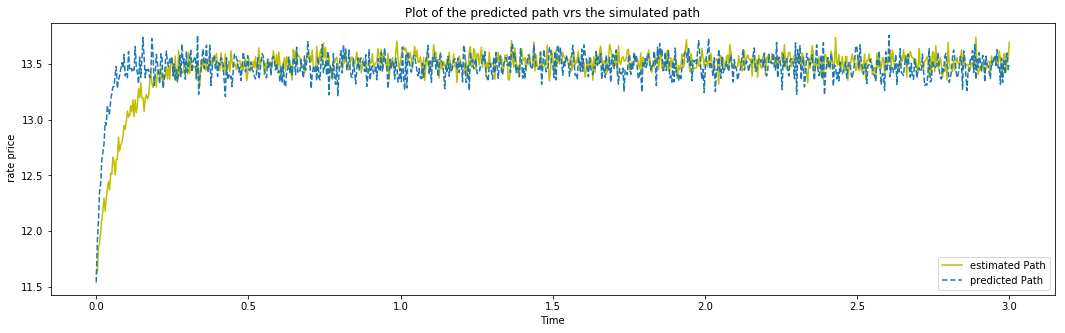

In [15]:
plt.figure(figsize=(18,5))
plt.plot( t, s,'y', label='estimated Path')
plt.plot( t, Sim_lSq_pred, '--',label='predicted Path')
plt.ylabel(' rate price')
plt.xlabel('Time')
#plt.xlim(0.4, 2)
#plt.ylim(13, 14)
plt.legend()
plt.title('Plot of the predicted path vrs the simulated path')

#### We have  calibrated the simulation to get estimates of the parameters which we have used to make a prediction.  Now we calculating the absolute and relative error between the predicted and the simulation. If these errors are minimal, then we can conclude that the parameter are good estimates for the process.

* Define the absolute error
#### ABSOLUTE   ERROR  $\,\,\,\,\, =\frac{1}{n}\sum_{i=1}^{n}|s(i)-pred_(\sigma_0, \lambda_0,\mu_0)(i)|$

In [16]:
def abs_err(data, prediction,m):
    n=821                          # the number of data points
    Err=[]               # an empty list to append the error between the simulation and predicted at each time step
    for i in range(m,n):       # this is to prevent adding the earlier points which changed very fast     
        Err.append(abs((data[i]-prediction[i])))
        mErr = (sum(Err)/n)*100
    return mErr,Err
    print('the absolute error is',mErr ,'percent')   

In [17]:
# Call the absolute error function with inputs simulation, predicted simulation and
# We start the error simulations where the process reaches equilibrium. Initial values are influenced by lambda so we 
# do not add those points to the error estimation. Hence we start from 137

lserror, idi_error=abs_err(s, Sim_lSq_pred,137) 
lserror

8.0901786367459643

### RELATIVE ERROR   $\,\,\,\,\,=\frac{1}{n}\sum_{i=1}^{n}|\left[s(i)-pred_{(\sigma_0, \lambda_0,\mu_0)}(i)\right]/s(i)|$

In [18]:
def rel_err(data, errors,n):
    Rel_Err=[]
    for i in range(n):
        Rel_Err.append( errors[i]/data[i] )   # an empty list to append error and data points at each time step
        mRel_Err =(sum(Rel_Err)/n)*100        # sum error and divide by number of data points.
    print('the relative error is',mRel_Err ,'percent')                  #in percentage
    
rel_err(s, idi_error,684)    

the relative error is 0.721343152706 percent


* The error of the simulation and the predicted is very minimal. 

## WEIGHTED LEAST SQUARES OU

The weighted least squares method is adopted to improve on the ordinary least squares. This method does not assume constant variance but rather place weights inversely proportional.

In [19]:
np.random.seed(1000)

n=820
vol=np.linspace(1,25, n)            # evenly space out weights on sigma
vol[0:int(n*(35/82))] = np.linspace(11.6,12.5, n-470) # add more weights to the earlier points

In [20]:
def weightedleastsquare(S,timdelta,vol):
    x=S[0:-1]
    y=S[1:]
    n=len(y)
    
    s = sum(1/(vol**2))                      # least square formulas
    sx = sum(x/vol**2)
    sy = sum(y/vol**2)
    sxx = sum((x**2)/vol**2)
    sxy = sum((x*y)/vol**2)
    syy = sum(y**2/vol**2)
#parameters a,b and epsilon of the least square equation are being computed for  
    calcslope =((s*sxy)-(sx*sy))/((s*sxx)-(sx**2))                              #the slope (b)
    calcintercept =((sxx*sy)-(sx*sxy))/((s*sxx)-(sx**2))                        #the intercept (a)
    stdDev=np.sqrt((s*syy)-sy**2-(calcslope*((s*sxy)-(sx*sy))))/(s*(s-2))       # estimated standard deviation 
# a,b and epsilon are used to compute the parameters of the model    
    lambdal = -np.log(calcslope)/timedelta                                       # estimated lambda 
    mu = calcintercept/(1-calcslope)                                             # estimated mu
    vol =stdDev*np.sqrt((-2*np.log(calcslope))/(timedelta*(1-calcslope**2)))     # estimated sigma
    #weighted fit
    weightedls = np.polyval([calcslope, calcintercept], x)                            #least square equation
    
    print('Weighted ''\n')
    print(' mu \t \t lambda \t \t sigma \t \t Slope \t  \t Intercept \t Standard Deviation \n')
    print( mu,'\t ' ,lambdal ,'\t', vol, calcslope,calcintercept,'\t', stdDev)
    return mu, lambdal, vol, stdDev , calcslope,calcintercept, weightedls

In [21]:
wm,wl,wcs,wci,wv,ws ,wls= weightedleastsquare(s,timedelta,vol)

Weighted 

 mu 	 	 lambda 	 	 sigma 	 	 Slope 	  	 Intercept 	 Standard Deviation 

13.474163451 	  32.3588672735 	 0.800244540472 0.88822459173 1.50608012083 	 0.0456994553263


In [22]:
Sim_wls_pred = predicted(821,3,32.359,13.474,0.8,11.614)        #predicted path with weighted least squares estimates

#### Absolute error of weighted least squares

In [23]:
wlserror, widi_error = abs_err(s, Sim_wls_pred,137)
wlserror

6.2882389910677574

#### Relative error of weighted least squares

In [24]:
rel_err(s, widi_error,684)              #in percentage

the relative error is 0.560649004535 percent


#### A plot of a normal fit, least squares and weighted least square fit to the simulation.

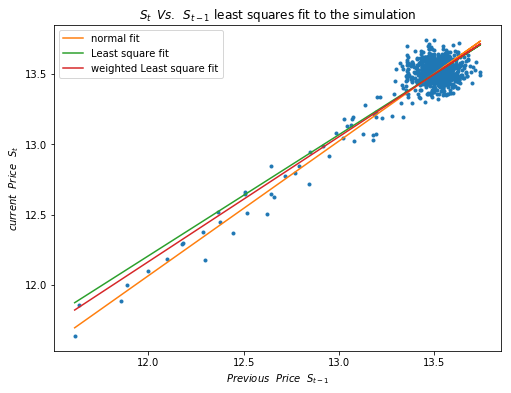

In [25]:
plt.figure(figsize=(8,6))
plt.plot( x ,y,'.' )
plt.plot(x,tf,label='normal fit')
plt.plot(x,uwls,label='Least square fit')
plt.plot(x,wls,label='weighted Least square fit')
plt.xlabel(r'$Previous\,\,\ Price\,\,\ S_{t-1}$')
plt.ylabel(r'$current \,\,\ Price\,\,\ S_{t}$')
plt.legend()
plt.title(r'$S_{t}\,\ Vs. \,\ S_{t-1}$ least squares fit to the simulation')
plt.savefig('OLsplot')

## The maximum likelihood method

Repeating the same approach of estimation with the maximum likelihood method, we estimate the paramters

In [26]:
%%time
def maxOU(S,timdelta,T):
    x=S[0:-1]
    y=S[1:]
    n=len(y)

    sx = sum(x)            # Maximum likelihood sums 
    sy = sum(y)
    sxx = sum(x**2)
    sxy = sum(x*y)
    syy = sum(y**2)
    # calculations for the parameters
    mu =((sxx*sy)-(sx*sxy))/((n*(sxx-sxy))-(sx**2-(sx*sy)))
    Lambda = (-1/timedelta)*(np.log((sxy-(mu*sx)-(mu*sy)+(n*mu**2))/(sxx-(2*mu*sx)+(n*mu**2))))
    a = np.exp(-Lambda*timedelta)  
    a2 = np.exp(-2*Lambda*timedelta) 
    sigma_square = (1/n)*(syy- (2*a*sxy) + (a2*sxx) - (2*mu*(1-a)*(sy-a*sx)) + (n*mu**2*(1-a)**2))
    sigma = np.sqrt((sigma_square*2*Lambda)/(1-a2))
    # print results
    print('Standard Maximum Likelihood ''\n')
    print(' mu \t \t lambda \t \t \t  sigma \n')
    print( mu,'\t ' ,Lambda ,'\t  \t ', sigma)
    return mu, Lambda,sigma_square ,sigma

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.44 µs


In [27]:
mi,lam,s_2 ,sig= maxOU(s,timedelta,3)

Standard Maximum Likelihood 

 mu 	 	 lambda 	 	 	  sigma 

13.4845835298 	  40.8466114649 	  	  1.69113559972


* Plot of initial simulation and prediction path by maximum likelihood estimates

In [28]:
max_pred = predicted(821,3,40.847,13.485,1.691,11.614)

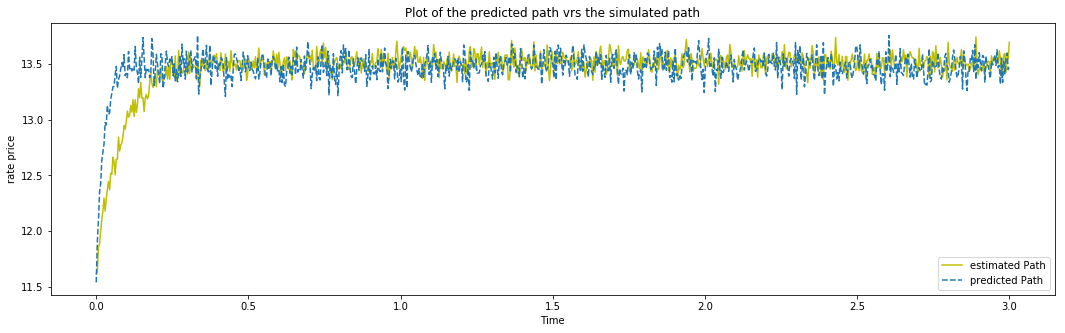

In [29]:
plt.figure(figsize=(18,5))
plt.plot( t, s,'y', label='estimated Path')
plt.plot( t, max_pred, '--',label='predicted Path')
plt.ylabel('rate price')
plt.xlabel('Time')
#plt.xlim(0.4, 2)
#plt.ylim(13, 14)
plt.legend()
plt.title('Plot of the predicted path vrs the simulated path')

* Using the function for the predicted path, we input into the function the estimates from the maximum likelihood method. Then find the absolute and relative error of the predicted and the simulations

####   Max likelihood absolute error  $\,\,\,\,\, =\frac{1}{n}\sum_{i=1}^{n}|s(i)-pred_(\sigma_0, \lambda_0,\mu_0)(i)|$

In [30]:
max_error, max_idi_error = abs_err(s, max_pred,137)
max_error

8.084651795488929

#### Max likelihood relative error   $\,\,\,\,\,=\frac{1}{n}\sum_{i=1}^{n}|\left[s(i)-pred_{(\sigma_0, \lambda_0,\mu_0)}(i)\right]/s(i)|$

In [31]:
rel_err(s, max_idi_error,684)             #in percentage

the relative error is 0.720850081886 percent


### KALMAN FILTER

This is in three parts; Since we have a simulation already, we omit the first step which is to simulate a  set of observation

In [32]:
# OUloglikelihoodfn
xVec = np.zeros(821)
def OUloglikelihoodfn(parameter):  # the function takes in an array of the parameters and measurement error covariance
    global xVec                      # make xVec callable outside the function
    N = 821
    TimeLength=3
    time = np.linspace(0,TimeLength,N) 
    TimeDelta= time[1]-time[0]
    mu=parameter[0]                  # assign first element of the array to mu
    lambd=parameter[1]               # assign second element of the array to lambda
    sig=parameter[2]                 # assign third element of the array to sigma
    R=parameter[3]                   # assign forth element of the array to the error covariance
    H=1                              # Since we have observed data, H is unity
    xVec = np.zeros(N) 
    M=np.exp(-lambd*TimeDelta)                                  
    C=mu*(1-M)                                          
    Q= (sig**2)*TimeDelta*((1-np.exp(-2*lambd*TimeDelta))/(2*lambd))  # state error covariance                 
    nsamples=len(s)                                                        
    LikeSum=0.5*nsamples*np.log(2*np.pi)                              #sum of likelihood                                
    #????
    x=s[0]                               
    xVec[0]=x               #set the initial element of the vector to the first observation                                
    P=Q                     #prior state error covariance 
    for i in range(1,nsamples):
        # predicting stage
        x = M*x+C                              
        P = M*P*M.T+ Q                          
        # updating stage
        MR = s[i] -H*x                 #Measurement (Innovation) Residual
        V = H*P*H + R                  # Residual (Innovation) Covariance
        K = P*H * V                    # Kalman Gain
        x = x + K*(MR)                 # Updated state estimate            
        xVec[i]=x                      # add updated state estimate to the vector 
        P = P - (K*H*P)                # update the state error covariance
        LikeSum1=LikeSum+(0.5*np.log(V))+(0.5*MR.T*(V)*MR)   # total likelihood of the process
    return LikeSum1

In [33]:
OUloglikelihoodfn(np.array([13.516, 12, 1.18, 0.01]))

752.15661611865426

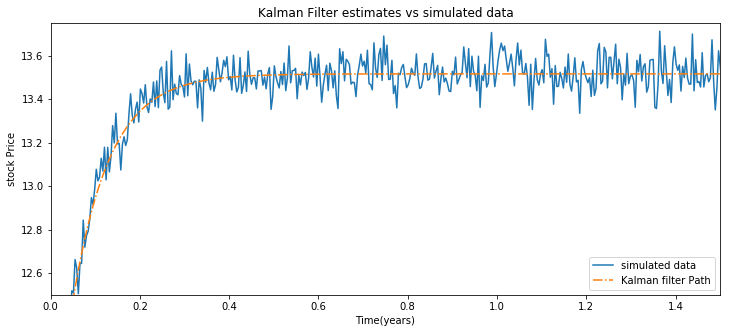

In [34]:
# plot of the simulation and the a vector of the estimated true state(xVec) 
N = 821
TimeLength=3
time = np.linspace(0,TimeLength,N)
TimeDelta= time[1]-time[0]

plt.figure(figsize=(12,5))
plt.plot(time, s,label = 'simulated data')
plt.plot(time, xVec, '-.', label ='Kalman filter Path')
plt.title('Kalman Filter estimates vs simulated data')
plt.legend ()
plt.xlabel('Time(years)')
plt.ylabel('stock Price')
plt.xlim(0, 1.5)
plt.ylim(12.5, 13.75)
plt.savefig('kalmanplot')

In [35]:
#OU_kalman
import scipy.optimize 

def OUKalman():     #filters a mean reversion process underlying parameters (mu, lambda, and sigma)
    lambd=12        # this is require so that the inital values of parameters can be printed below 
    mu=13.516 
    Dsig =1.18 

    muGuess=9       # Make initial guess of parameters which will be estimated 
    lambdaGuess=10
    sigGuess=0.99
    RGuess=0.01
    param=np.zeros(4)              #vector of initially guessed parameter values
    param[0]=muGuess               # asign the initially guessed values to elements of array to be optimized
    param[1]=lambdaGuess
    param[2]=sigGuess
    param[3]=RGuess
    
    pnew=scipy.optimize.fmin(OUloglikelihoodfn, param)   #minimization of the likelihood
    muNew = pnew[0]                                      # mu estimate
    lambdaNew = pnew[1]                                  # lambda estimate
    DsigNew = pnew[2]                                    # Sigma estimate
    RNew = pnew[3]
    print( ' Kalman Filter estimate \n')    
    print( ' \t \t   mu \t \t\t lambda \t \t \t \t sigma  \n')
    print('True ','\t \t', mu,'\t \t \t' ,lambd,'\t \t \t \t', Dsig)
    print('Estimated ',' \t', muNew,'\t \t ' ,lambdaNew,'\t  \t \t', DsigNew)
    print('Measurement Noise Covariance =R = ',' \t', RNew)
    
OUKalman()    

 Kalman Filter estimate 

 	 	   mu 	 		 lambda 	 	 	 	 sigma  

True  	 	 13.516 	 	 	 12 	 	 	 	 1.18
Estimated   	 13.4761937303 	 	  12.2143945577 	  	 	 1.01146693696
Measurement Noise Covariance =R =   	 -0.000153217666572


#### Kalman filter absolute error  $\,\,\,\,\, =\frac{1}{n}\sum_{i=1}^{n}|s(i)-pred_(\sigma_0, \lambda_0,\mu_0)(i)|$

In [36]:
KF_error, KF_idi_error = abs_err(s, xVec,137)
KF_error

5.4000417360023398

#### Kalman filter relative error   $\,\,\,\,\,=\frac{1}{n}\sum_{i=1}^{n}|\frac{\left[s(i)-pred_{(\sigma_0, \lambda_0,\mu_0)}(i)\right]}{s(i)}|$

In [37]:
rel_err(s, KF_idi_error,684)

the relative error is 0.481404760207 percent


### Next, just like we used the parameter values of the SA exchange rates to simulate a path, this time we use the real data calibrated to the estimation method to find the estimates of the parameters of the model and use that to predict into the future od the Rand exchange rate.

##  RESULT

The path above was simulated using the mean and standard deviation of real interest rate of the South African Rand, since we believe the rate is an OU process. Now we use the SA exchange rate of data length 821 dated January 2015 to January 2018.

We find the parameter estimates by calibration the data to the model on estimation techniques. We use the new set of parameters to simulate a path and see how close the real path of rates and the simulated path are together and the error margin of the two set of data.
Consequently, the error of the simulation and the real data should be minimal. Estimates from alltechniques will be compared to verify which approach gives better estimates.

In [38]:
# read SA exchange rate time series into pandas

gf=pd.read_csv('trueSAdata.csv', index_col='Date', names=['Date', 'Rate'], header=1)               # read the file

* There are some missing data points, probably due to holidays and non- trading days of rates. Hence we use python method to fill in the missing data backwards.

In [39]:
gf= gf.fillna(method='bfill')                                        # bfill method fills in missing data backwards

* Plotting the time series of the SA exchange rate.

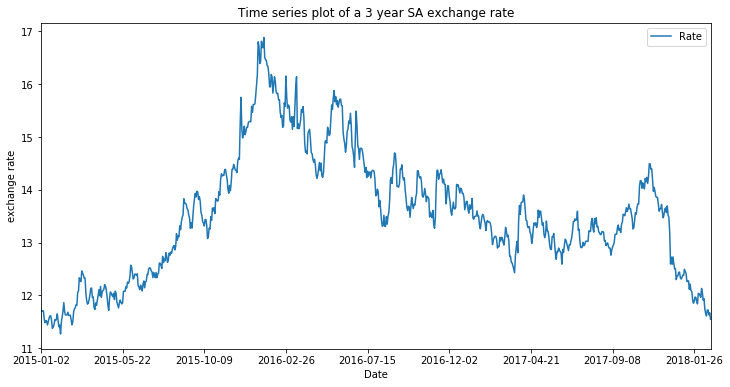

In [40]:
gf.plot(figsize=(12, 6))
plt.ylabel('exchange rate')
plt.title('Time series plot of a 3 year SA exchange rate')
plt.savefig('realSAdata')

*   Converting the series into an array which will be used to stimulate OU path as a sample of the series.

In [41]:
IRdata = pd.DataFrame(gf.values)                  # put it into a pandas dataframe
gf2 = np.array(IRdata[0])                     # convert the extracted series into an array which would be used

* Print the statistics of the exchange rate so we know the mean and standard deviation of the sample of the rates taken

In [42]:
def print_statistics(rates):  
    ''' Prints selected statistics.
    Parameters
    ==========
    array: ndarray       (object to generate statistics on)
    '''
    sta = scs.describe(rates)
    print ("%14s %15s"   % ('statistic', 'value'))
    print (35 * "-")
    print ("%14s %15.5f" % ('size', sta[0]))
    print ("%14s %15.5f" % ('min', sta[1][0]))
    print ("%14s %15.5f" % ('max', sta[1][1]))
    print ("%14s %15.5f" % ('mean', sta[2]))
    print ("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print ("%14s %15.5f" % ('skew', sta[4]))
    print ("%14s %15.5f" % ('kurtosis', sta[5]))
print_statistics(gf2)

     statistic           value
-----------------------------------
          size       821.00000
           min        11.27050
           max        16.88450
          mean        13.51694
           std         1.18185
          skew         0.39291
      kurtosis        -0.27539


In [43]:
gf2[0]

11.699

## Estimation of rates data using least squares method

In [44]:
um,ul,ucs,uci,uv,us ,uwl1= Ordinary_LS(gf2,timedelta)         #call the function and input exchange rates data

Ordinary Least squares 

 mu 	 	 lambda 	 	 sigma 	 	 Slope 	  	 Intercept 	 Standard Deviation 

13.4969335354 	  2.22259257831 	 2.52844152546 0.9918916864 	 0.109437369748 	 0.152407421196


* Use new estimates to predict the path of the rates and calculate the error margin

In [45]:
SA_lspred=predicted(821,3,2.223,13.497,2.528,11.699)

#### Absolute error 

In [46]:
SA_LSerror, SA_LSidi_error = abs_err(gf2, SA_lspred,400)
SA_LSerror

26.945735327177537

#### Relative error

In [47]:
rel_err(gf2, SA_LSidi_error,421)

the relative error is 3.87366738082 percent


### Estimation by weighted least square

* We place more weights on the earlier data points which changes very frequently due to the reversion rate. This also give a good estimate $\lambda$.

In [48]:
np.random.seed(1000)
n=820
Sigma=np.linspace(1,18, n)            # least square using weights 
Sigma[0:int(n*(20/41))] = np.linspace(11,16, n-420)
wm,wl,wcs,wci,wv,ws ,wl1= weightedleastsquare(gf2,timedelta,Sigma)

Weighted 

 mu 	 	 lambda 	 	 sigma 	 	 Slope 	  	 Intercept 	 Standard Deviation 

13.4904999433 	  2.52074427322 	 0.893190343095 0.990809002312 0.123991153794 	 0.0538097225695


In [49]:
wpred=predicted(821,3,2.521,13.491,0.893,11.699)

In [50]:
SA_WLSerror, SA_WLSidi_error = abs_err(gf2, wpred,400)
SA_WLSerror

25.960953306865996

In [51]:
rel_err(gf2, SA_WLSidi_error,421)

the relative error is 3.73284429033 percent


#### Plot of Weighted LS and oridnary LS fit to SA data

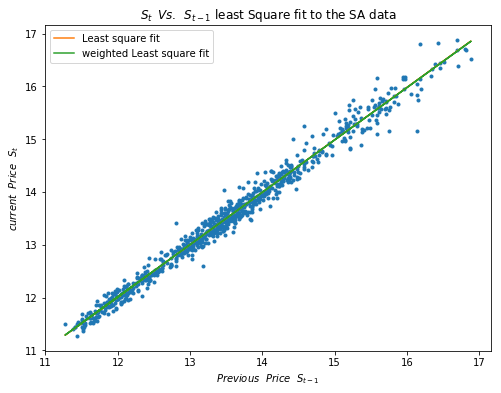

In [52]:
X=gf2[0:-1]
Y=gf2[1:]
plt.figure(figsize=(8,6))
plt.plot( X,Y,'.' )
plt.plot(X,uwl1,label='Least square fit')
plt.plot(X,wl1,label='weighted Least square fit')
plt.xlabel(r'$Previous\,\,\ Price\,\,\ S_{t-1}$')
plt.ylabel(r'$current \,\,\ Price\,\,\ S_{t}$')
plt.legend()
plt.title(r'$S_{t}\,\ Vs.\,\ S_{t-1}$ least Square fit to the SA data')
plt.savefig('OLsplotSA')

## Estimation using maximum likelihood

In [53]:
mi,lam,s_2 ,sig= maxOU(gf2,timedelta,3)

Standard Maximum Likelihood 

 mu 	 	 lambda 	 	 	  sigma 

13.4969335354 	  2.2225925783 	  	  2.52535617773


In [54]:
SA_maxpred=predicted(821,3,1.334,13.497,1.956,11.699)

In [55]:
SA_maxerror, SA_maxidi_error = abs_err(gf2, SA_maxpred,400)
SA_WLSerror

25.960953306865996

In [56]:
rel_err(gf2, SA_maxidi_error,421)

the relative error is 3.98169275742 percent


## Estimation using Kalman filter

Since we have observated data, we do not make use of the function simulateOUKalman.

In [57]:
xVec = np.zeros(821)
def OUloglikelihoodfn(parameter):
    global xVec
    N = 821
    TimeLength=3
    time = np.linspace(0,TimeLength,N)
    TimeDelta= time[1]-time[0]
    mu=parameter[0]
    lambd=parameter[1]
    sig=parameter[2]
    R=parameter[3]
    H=1
    xVec = np.zeros(N)
    M=np.exp(-lambd*TimeDelta)                              
    C=mu*(1-M)                                          
    Q= (sig**2)*TimeDelta*((1-np.exp(-2*lambd*TimeDelta))/(2*lambd))                      
    nsamples=len(gf2)                                       #                    
    LikeSum=0.5*nsamples*np.log(2*np.pi)                                 
    x=gf2[0]                            
    xVec[0]=x                                                  
    P=Q                    
    for i in range(1,nsamples):
        # predicting stage
        x = M*x+C                               # state prediction 
        P = M*P*M.T+ Q                          #covar prediction 
        # updating stage
        MR = gf2[i] -H*x                           #Measurement Residual(Innovation) 
        V = H*P*H + R                              #  (Innovation) Covariance
        K = P*H * V                                # Kalman Gain
        #x(k|k) State Correction based on observation res.
        x = x + K*(MR)                
        xVec[i]=x
        P = P - (K*H*P) 
        LikeSum1=LikeSum+(0.5*np.log(V))+(0.5*MR.T*(V)*MR)
    return LikeSum1
OUloglikelihoodfn(np.array([13.517, 1.334, 1.182, 0.01]))

752.2556389915211

In [58]:
#OU_kalman
import scipy.optimize 

def OUKalman():     #filters a mean reversion process underlying parameters (mu, lambda, and sigma)
    lambd=1.334 
    mu=13.517 
    Dsig =1.182 
    
    muGuess=8.05
    lambdaGuess=0.8
    sigGuess=0.98
    RGuess=0.01
    param=np.zeros(4)
    param[0]=muGuess
    param[1]=lambdaGuess
    param[2]=sigGuess
    param[3]=RGuess
    
    pnew=scipy.optimize.fmin(OUloglikelihoodfn, param)
    muNew = pnew[0]
    lambdaNew = pnew[1]
    DsigNew = pnew[2]
    RNew = pnew[3]
    print(1, ' \t \t   mu \t \t lambda \t \t \t \t sigma  \n')
    print('True ','\t \t', mu,'\t \t \t ' ,lambd,'\t \t \t', Dsig)
    print('Estimated ',' \t', muNew,'\t \t' ,lambdaNew,'\t  \t \t', DsigNew)
    print('Measurement Noise Covariance =R = ',' \t', RNew)
    
OUKalman()    

1  	 	   mu 	 	 lambda 	 	 	 	 sigma  

True  	 	 13.517 	 	 	  1.334 	 	 	 1.182
Estimated   	 13.493508343 	 	 1.13620209604 	  	 	 1.00593509496
Measurement Noise Covariance =R =   	 -0.00162738617786


In [59]:
SA_KFpred=predicted(821,3,1.136,13.494,1.006,11.699)

#### Absolute error

In [60]:
SA_KFerror, SA_KFidi_error = abs_err(gf2, SA_KFpred,400)
SA_KFerror

27.718970942330007

#### Relative error

In [61]:
rel_err(gf2, SA_KFidi_error,421)

the relative error is 4.06262706951 percent


### Prediction of the path of the Rand for the next 120 days

Using estimates from the Kalman filter - since it gives much better estimates as compared to the other methods considered, we can predict the future price of the rate of the Rand for the next few days. Here we consider predictions for the next 120 days.

In [62]:
gf2[-1]

11.550000000000001

In [63]:
Spredictedpath= pathsimulation(11.55,1.136,13.577,120/365,1.006,1,120)

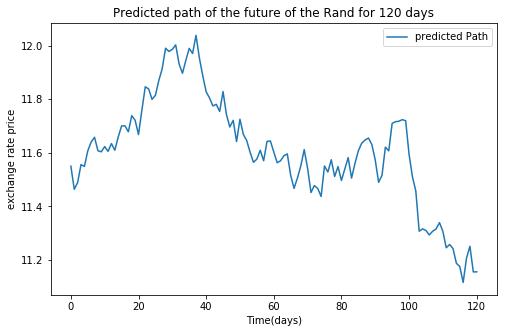

In [64]:
#plt.plot(Spredictedpath)
plt.figure(figsize=(8,5))
plt.plot(Spredictedpath,label='predicted Path')
plt.ylabel('exchange rate price')
plt.xlabel('Time(days)')
plt.legend()
plt.title('Predicted path of the future of the Rand for 120 days')
plt.savefig('realpredictedpathofRand')

In [65]:
# The prediction of the rate on the 20th day is projected to be 11.668

Spredictedpath[20]

array([ 11.66796138])

### 4.5.1

###### Recalibrating the first 110 series of the predictions to predict for the last 10 series. This is to see if the last 10 terms predicted is actually very close to the predicted path.

In [66]:
next1=np.concatenate( Spredictedpath, axis=0 )
next11=next1[0:110]

In [67]:
um,ul,ucs,uci,uv,us ,uwl1= Ordinary_LS(next11,timedelta) 

Ordinary Least squares 

 mu 	 	 lambda 	 	 sigma 	 	 Slope 	  	 Intercept 	 Standard Deviation 

11.5929473519 	  9.77471120604 	 0.87720303432 0.964828606799 	 0.407740109674 	 0.0521543193747


In [68]:
Spredictedpath[120]

array([ 11.15610612])

In [69]:
verify_projections= pathsimulation(11.156,9.775,11.593,10/365,0.877,1,10)     

* In these last two cells, it is seen that the original predictions at each time step is very closely predicted, so our model does good predictions.

In [70]:
np.concatenate( verify_projections, axis=0 )            #recalibrated prediction of the last 10 terms in Spredictedpath

array([ 11.156     ,  11.0873815 ,  11.11665287,  11.18233912,
        11.18174906,  11.23780952,  11.27092666,  11.28970514,
        11.24870806,  11.24922981,  11.27014192])

In [71]:
np.concatenate(Spredictedpath[111:120], axis=0 )         #last 10 terms of original prediction

array([ 11.24574667,  11.258012  ,  11.24291812,  11.18773287,
        11.17592513,  11.1164705 ,  11.20765061,  11.25153629,  11.1556683 ])